# You can do Machine Learning

Not a comprehensive tutorial.

## Step 1. Developing in Python

### Python

Python is an interpreted language that is very popular in data science. It's slow but very flexible. Dynamic typing makes it perfect for torturing actual software developers.

Python has "virtual environments" instead of projects. The package manager is called `pip`.

### Visual Studio Code

VS Code seems to be a popular, cross-platform app for Python development. It's a text editor, not a full-fledged IDE, but there is a rich marketplace of extensions that provide language-specific behavior.

### Jupyter notebooks

Notebooks are a cool way to meld markdown with code, creating executable documentation.

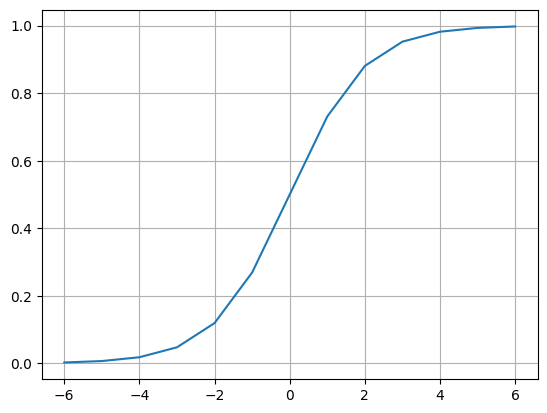

In [6]:
import math
import matplotlib.pyplot as plt

x = range(-6, 7)
y = [ 1 / (1 + math.exp(-z)) for z in x ]   # sigmoid function

plt.plot(x, y)
plt.grid()
plt.show()

Note that ranges in Python are [inclusive, exclusive).

## Step 2. PyTorch

PyTorch is an open source machine learning framework created by Meta that is becoming more popular than Google's Tensorflow. It can run on either the CPU (slow) or GPU (fast, called "CUDA").

In [7]:
import torch

print(torch.__version__)

2.0.1+cpu


## Step 3. Tensors

A tensor is an N-dimensional array.

<img src="https://miro.medium.com/1*6Z892ClZGon03_Mawj4Pew.png" width="400"/>

### 0-dimensional tensor

Also known as a scalar. Here we create a tensor from a single numeric value:

In [8]:
ndim0 = torch.tensor(3.1415)
print(ndim0)

tensor(3.1415)


### 1-dimensional tensor

Also known as a vector. One way to create a 1D tensor is from a Python list:

In [12]:
ndim1 = torch.tensor([1, 2, 4, 8, 16, 32])
print(ndim1)

tensor([ 1,  2,  4,  8, 16, 32])


(Note: A vector can also be considered as a position in N-dimensional space. Both interpretations are valid, but don't get them mixed up.)

### 2-dimensional tensor

Also known as a matrix, which is essentially a table of rows and columns. Here, we generate a 1D tensor of 12 integers, and then change its shape to 2D:

In [13]:
ndim1 = torch.arange(0, 12)
ndim2 = ndim1.view(3, 4)   # 3 rows by 4 columns
print(ndim2)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


We can directly modify the data in the tensor:

In [14]:
ndim2[1,0] = -100
print(ndim2)

tensor([[   0,    1,    2,    3],
        [-100,    5,    6,    7],
        [   8,    9,   10,   11]])


Note that the view shares its data with the original tensor:

In [15]:
print(ndim1)

tensor([   0,    1,    2,    3, -100,    5,    6,    7,    8,    9,   10,   11])


We can also transpose a tensor's rows and columns:

In [16]:
print(ndim2.transpose(0, 1))   # transpose dim-0 and dim-1

tensor([[   0, -100,    8],
        [   1,    5,    9],
        [   2,    6,   10],
        [   3,    7,   11]])


### 3-dimensional tensor

Here's a 3D tensor with random values:

In [21]:
ndim3 = torch.rand(2, 3, 4)   # 2 layers X 3 rows X 4 columns
print(ndim3)

tensor([[[0.6704, 0.3949, 0.8724, 0.4718],
         [0.3681, 0.2176, 0.2874, 0.6487],
         [0.0413, 0.7934, 0.5069, 0.3951]],

        [[0.5911, 0.1680, 0.9670, 0.8440],
         [0.4403, 0.6218, 0.7946, 0.0723],
         [0.2815, 0.4730, 0.7510, 0.8350]]])


You can ask any tensor for its shape:

In [19]:
print(ndim3.shape)

torch.Size([2, 3, 4])


### Higher dimensions

It gets harder to visualize tensors as the number of dimensions increases:

In [23]:
ndim4 = torch.rand(2, 3, 2, 3)   # 2 hyperlayers X 3 layers X 2 rows X 3 columns
print(ndim4)

tensor([[[[0.0071, 0.1240, 0.1678],
          [0.0570, 0.8282, 0.3355]],

         [[0.1820, 0.8695, 0.9260],
          [0.2144, 0.4915, 0.6679]],

         [[0.8252, 0.3873, 0.9095],
          [0.9598, 0.2337, 0.2632]]],


        [[[0.0374, 0.1567, 0.2685],
          [0.2097, 0.7591, 0.0588]],

         [[0.2227, 0.0488, 0.6856],
          [0.3322, 0.2554, 0.8200]],

         [[0.9069, 0.7070, 0.2897],
          [0.6630, 0.7130, 0.1973]]]])


### Changing dimensionality

Start with a 1D vector:

In [24]:
vector = torch.arange(-4, 5)   # 1D: 9 columns
print(vector)
print(vector.shape)

tensor([-4, -3, -2, -1,  0,  1,  2,  3,  4])
torch.Size([9])


If we insert a dimension of size 1 in front, the columns stay columns:

In [28]:
unsq0 = vector.unsqueeze(0)   # 2D: 1 row x 9 columns
print(unsq0)                  # note the extra pair of brackets in the output
print(unsq0.shape)

tensor([[-4, -3, -2, -1,  0,  1,  2,  3,  4]])
torch.Size([1, 9])


But if we insert a dimension of size 1 at the end, the columns become rows:

In [29]:
unsq1 = vector.unsqueeze(1)   # 2D: 9 rows x 1 column
print(unsq1)
print(unsq1.shape)

tensor([[-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]])
torch.Size([9, 1])


## Step 4. Neural network building blocks

Some examples from the "nn" zoo:

In [30]:
import torch.nn as nn

In general, these are functions of type `Tensor -> Tensor`, so a complex neural network can be built by composition. During training, the model learns the best values for the parameters inside these blocks.

### Linear layer

Applies a linear transformation: **y = xW<sup>T</sup> + B**

Where:
* **x** is the input tensor
* **y** is the output tensor
* **W** is a 2D tensor of weight parameters
* **B** is a 1D tensor of bias parameters
* **xW<sup>T</sup>** is matrix multiplication of **x** by the transpose of **W**.

In [32]:
linear = nn.Linear(in_features = 20, out_features = 30)
print("Weight:", linear.weight.shape)
print("Bias:", linear.bias.shape)
print("Total # of parms:", sum(parm.numel() for parm in linear.parameters()))   # (30 x 20) + 30

Weight: torch.Size([30, 20])
Bias: torch.Size([30])
Total # of parms: 630


Linear transforms are useful for "projecting" a tensor into a different shape with the same number of dimensions:

In [33]:
x = torch.rand(5, 6, 20)   # last dimension must match linear input
print("Input:", x.shape)
y = linear(x)              # result is still 3D, but now with 30 columns
print("Output:", y.shape)

Input: torch.Size([5, 6, 20])
Output: torch.Size([5, 6, 30])


### Dropout layer

Randomly sets some of the input to zero during training (and the remaining elements are scaled up proportionally). Dropout prevents the model from becoming too reliant on a small set of parameters.

A dropout layer has no parameters, but its dropout rate (e.g. 20%) is a hyperparameter.

In [34]:
dropout = nn.Dropout(0.2)

x = torch.ones(3, 4)
print(x)
y = dropout(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1.2500, 0.0000, 1.2500, 1.2500],
        [1.2500, 1.2500, 0.0000, 0.0000],
        [1.2500, 1.2500, 0.0000, 1.2500]])


The dropout is recomputed during each application, so results are not deterministic:

In [41]:
y = dropout(x)
print(y)

tensor([[1.2500, 1.2500, 1.2500, 1.2500],
        [1.2500, 0.0000, 0.0000, 1.2500],
        [1.2500, 1.2500, 1.2500, 1.2500]])


### Layer normalization

Normalizes input around its mean and standard deviation. This reduces training time by reining in large values.

In [42]:
numColumns = 4
norm = nn.LayerNorm(numColumns)   # expect last dimension of this size

x = torch.arange(0.0, 12.0).view(-1, numColumns)   # -1: PyTorch infers the # of rows
print(x)
y = norm(x)
print(y)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
tensor([[-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416],
        [-1.3416, -0.4472,  0.4472,  1.3416]],
       grad_fn=<NativeLayerNormBackward0>)


The normalization can have weight and bias parameters that the model learns during training:

In [43]:
print("Weight:", norm.weight)
print("Bias:", norm.bias)

Weight: Parameter containing:
tensor([1., 1., 1., 1.], requires_grad=True)
Bias: Parameter containing:
tensor([0., 0., 0., 0.], requires_grad=True)


### Embedding

asdf

### Activation

asdf

## Step 5. Building a model

### Non-linear regression

Let's say we have simple non-linear function that we want a neural network to learn. (This is like using a bomb to kill an ant, but it illustrates the basic principle well.)

In [58]:
def targetFunc(x):
    return 3 * x ** 2 + 10

We need some training data, consisting of input and output tensors from the function:

In [59]:
domain = 6.0
xBatch = torch.arange(-domain, domain+1).unsqueeze(1)
print("Input:\n", xBatch)

yTarget = targetFunc(xBatch)
print("Output:\n", yTarget)

Input:
 tensor([[-6.],
        [-5.],
        [-4.],
        [-3.],
        [-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.]])
Output:
 tensor([[118.],
        [ 85.],
        [ 58.],
        [ 37.],
        [ 22.],
        [ 13.],
        [ 10.],
        [ 13.],
        [ 22.],
        [ 37.],
        [ 58.],
        [ 85.],
        [118.]])


The target function is a parabola:

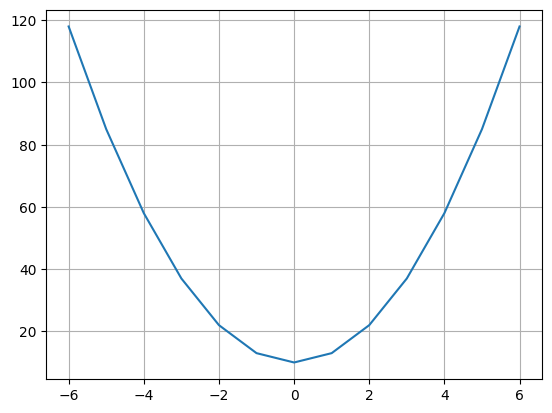

In [60]:
plt.plot(xBatch, yTarget)
plt.grid()
plt.show()

Now define the model, which consists of a non-linear layer sandwiched between two linear layers. Since the target function is scalar -> scalar, the model must have a single input value and a single output value, but we can give the model lots of parameters in between.

In [61]:
projection = 10
model = nn.Sequential(
    nn.Linear(1, projection),   # linear
    nn.ReLU(),                  # non-linear
    nn.Linear(projection, 1))   # linear

The model's parameters are initialized with random values by default.

In [62]:
for (name, parm) in model.named_parameters():
    print("\n{}: {}".format(name, parm.data.shape))
    print("   ", parm.data)

numParms = sum(parm.numel() for parm in model.parameters())
print("\nTotal # of parameters:", numParms)


0.weight: torch.Size([10, 1])
    tensor([[-0.2878],
        [-0.7297],
        [-0.5494],
        [-0.9387],
        [ 0.6788],
        [ 0.2161],
        [ 0.9038],
        [-0.1571],
        [-0.1315],
        [ 0.3413]])

0.bias: torch.Size([10])
    tensor([ 0.6909, -0.6365, -0.0283,  0.1556,  0.8733, -0.6854,  0.2711, -0.5166,
        -0.3623,  0.4729])

2.weight: torch.Size([1, 10])
    tensor([[ 0.1689,  0.0410,  0.2505, -0.0851, -0.2908,  0.0687, -0.1715,  0.0578,
         -0.2617,  0.0972]])

2.bias: torch.Size([1])
    tensor([0.0415])

Total # of parameters: 31


To train the model, we need:
* A loss function that determines how far off target the model is, and
* An optimizer that will attempt to minimize the loss. The optimizer's "learning rate" determines how much of an adjustment it will make to the model's parameters on each iteration.

In [63]:
lossFunc = nn.MSELoss()   # mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)   # stochastic gradient descent

Now, we're ready to train the model. During each iteration:

1. Make a forward pass to generate a batch of predicted values.
2. Calculate the difference between the predicted and target values. This is called the "loss".
3. Make a backward pass from the loss through the model to calculate gradients, which are the directions in which each parameter much be adjusted.
4. Adjust each parameter by a small amount accordingly. We don't want to overshoot the best value.

Epoch 0, loss 4141.0029296875


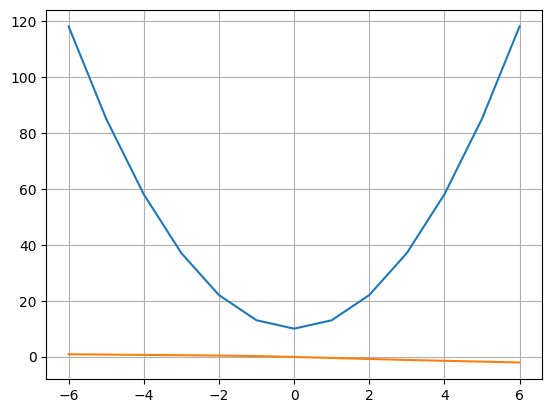

Epoch 1, loss 3911.5849609375


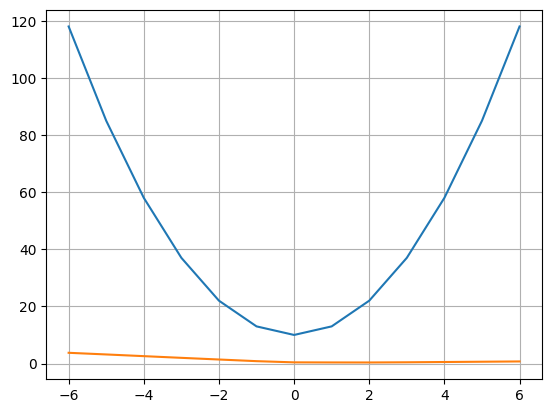

Epoch 2, loss 3687.078369140625


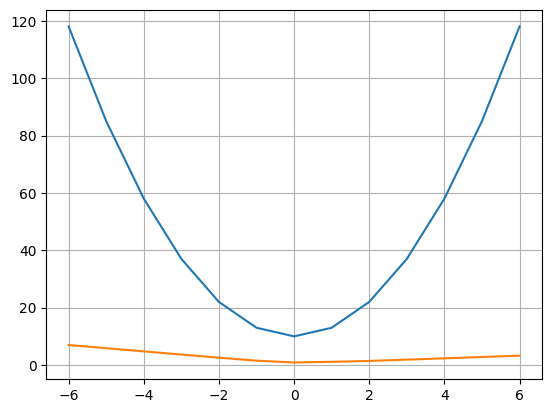

Epoch 4, loss 3093.74169921875


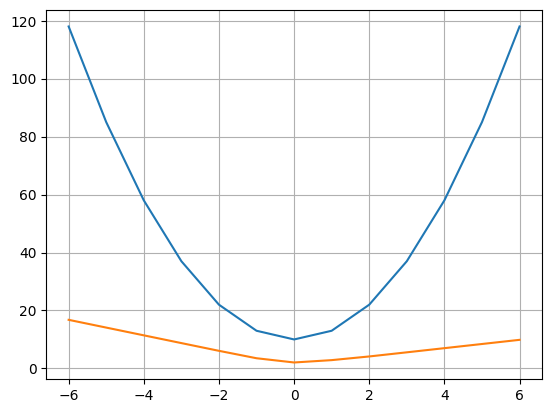

Epoch 8, loss 1134.424560546875


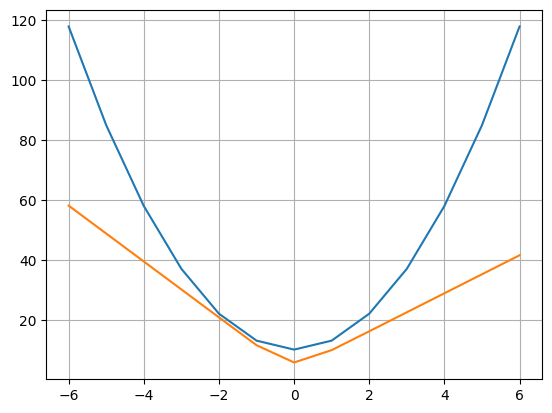

Epoch 16, loss 142.27728271484375


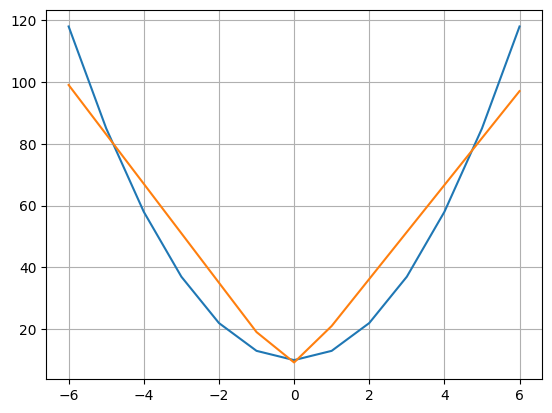

Epoch 32, loss 134.10572814941406


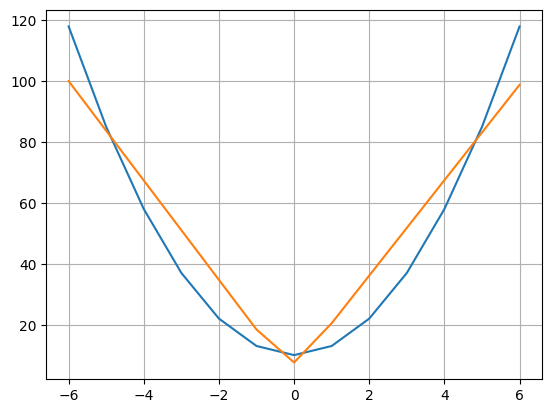

Epoch 64, loss 122.47874450683594


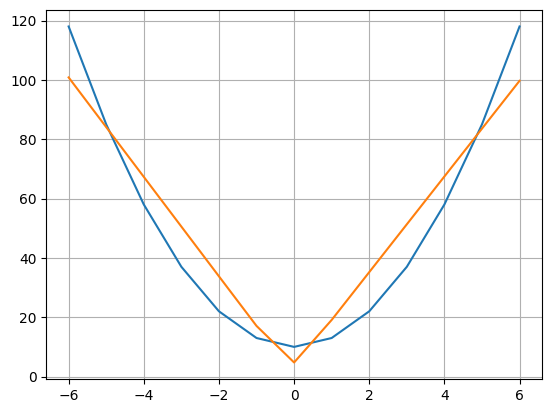

Epoch 128, loss 103.68971252441406


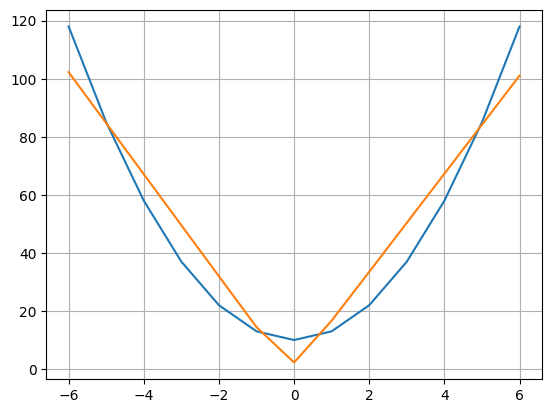

Epoch 256, loss 77.16671752929688


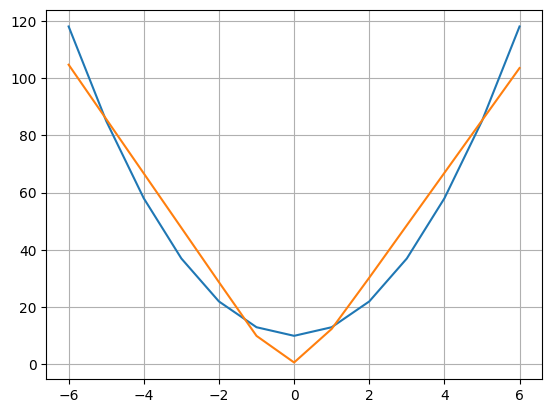

Epoch 512, loss 52.23232650756836


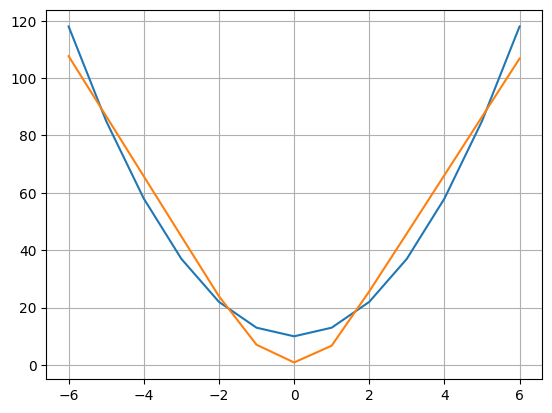

Epoch 1024, loss 21.755332946777344


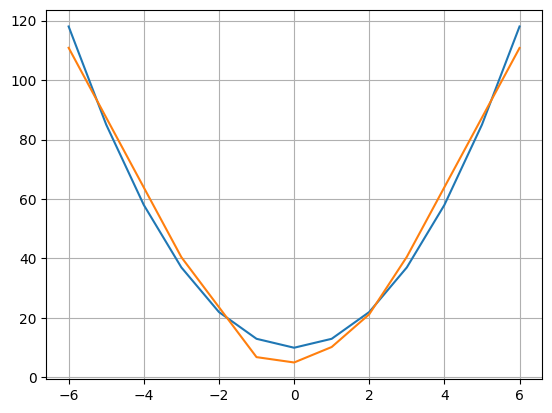

Epoch 2048, loss 3.7921977043151855


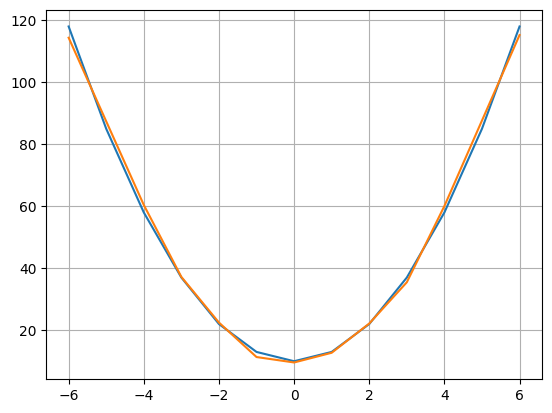

Epoch 4096, loss 1.8673408031463623


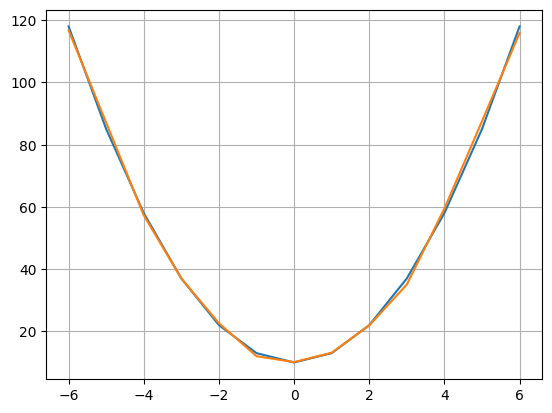

Epoch 8192, loss 1.2074745893478394


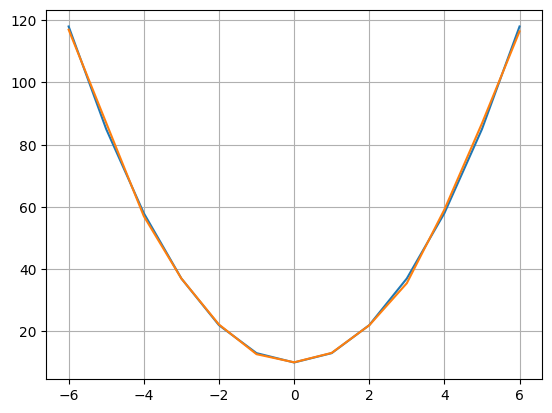

Epoch 16384, loss 0.5825792551040649


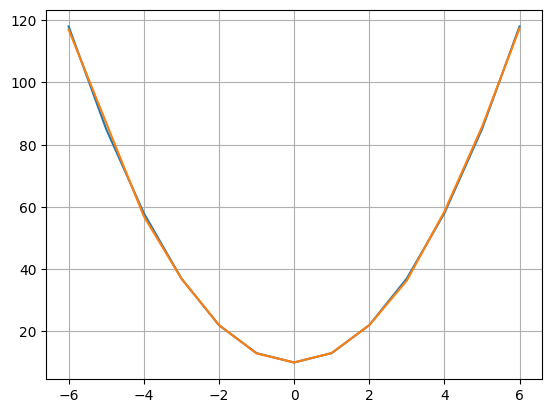

Epoch 32768, loss 0.46253108978271484


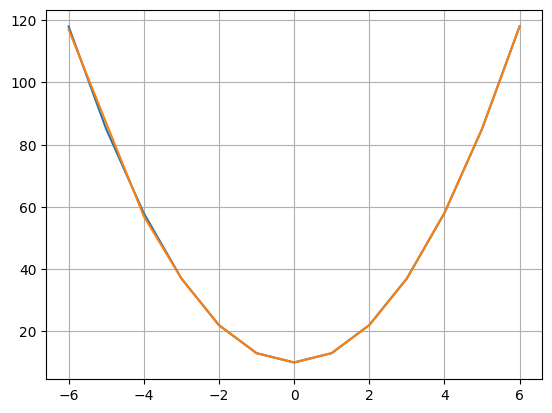

Epoch 65536, loss 0.4615393280982971


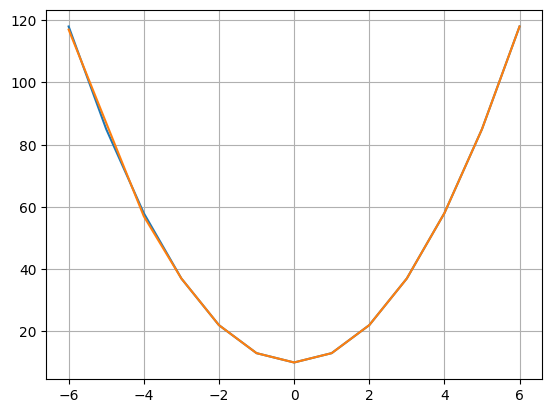

In [64]:
for epoch in range(100000):

    # forward pass
    yPrediction = model(xBatch)

    # calculate loss
    loss = lossFunc(yPrediction, yTarget)
    if (epoch & (epoch-1) == 0):   # check for power of 2
        print("Epoch {}, loss {}".format(epoch, loss))
        with torch.no_grad():
            plt.plot(xBatch, yTarget)
            plt.plot(xBatch, yPrediction)
        plt.grid()
        plt.show()

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # adjust parameters
    optimizer.step()

The model has learned parameter values that approximate the target function well.

In [65]:
for (name, parm) in model.named_parameters() :
    print("{}: {}".format(name, parm.data))

0.weight: tensor([[-1.5102],
        [-1.8684],
        [-1.6625],
        [-2.1623],
        [ 2.2213],
        [ 1.6168],
        [ 1.8853],
        [-0.6491],
        [-0.0464],
        [ 2.1771]])
0.bias: tensor([ 2.3214, -6.8742, -3.3891, -1.1050,  1.4157, -7.2757, -4.9223, -2.3777,
        -0.3785, -1.5685])
2.weight: tensor([[ 2.6797,  7.0638,  3.7525,  2.2915,  2.4518,  7.4184,  5.2143,  2.4052,
         -0.2474,  2.6307]])
2.bias: tensor([0.3087])
